In [1]:
from pathlib import Path
import pandas as pd
import sys
import random
from termcolor import colored

sys.path.append(str(Path("..").resolve()))
from src import *

# Generate the dataset (ShapeNetCore)
##### ℹ️ This notebook requires the ShapeNetCore to be downloaded in the `dataset/shapenetcore/objects` root folder.
This notebook generate the dataset as triplets of _rendering_, _UV map_ and _diffuse texture_.
##### ⚠️ This notebook is just a preview of the actual script (see [generate_dataset.py](generate_dataset.py)). The generation of the entire dataset is expensive and thus requires a computation node.

In [2]:
dataset = ShapeNetCoreDataset3D()

Select only the objects with 1 Mesh, 1 UV map and 1 Diffuse texture

In [8]:
uids = dataset.statistics[dataset.statistics["valid"]].index

Info: Removed 76 vertices


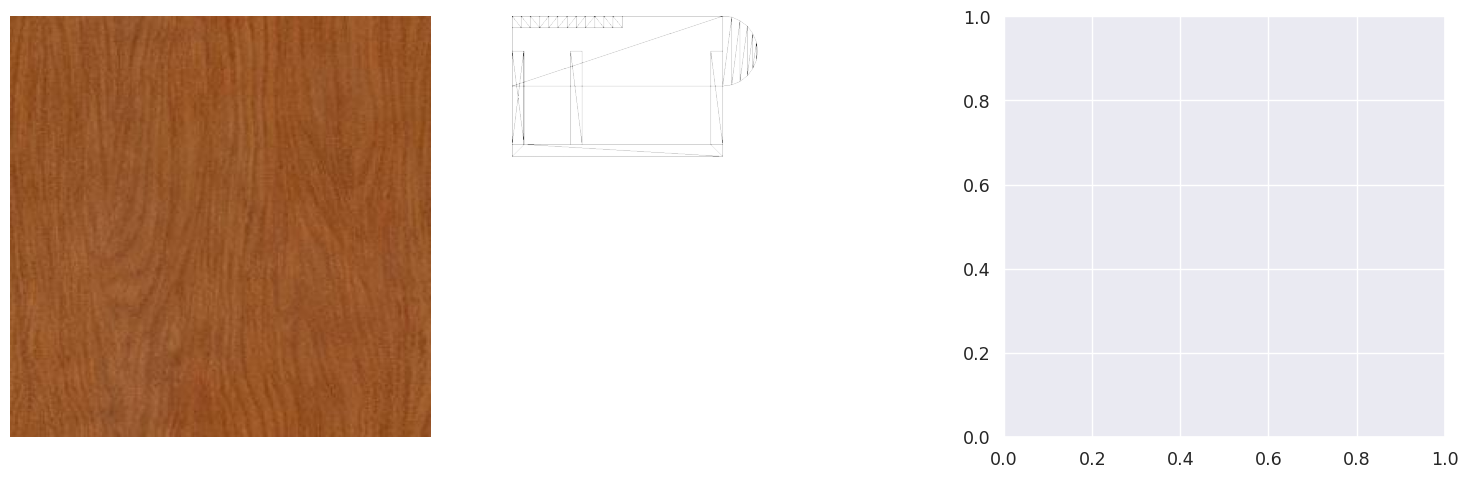

[b0890c9a4332f7a07e28af1b4b42317e] UV density = 0.78% --> TOO LOW
Info: Removed 64 vertices


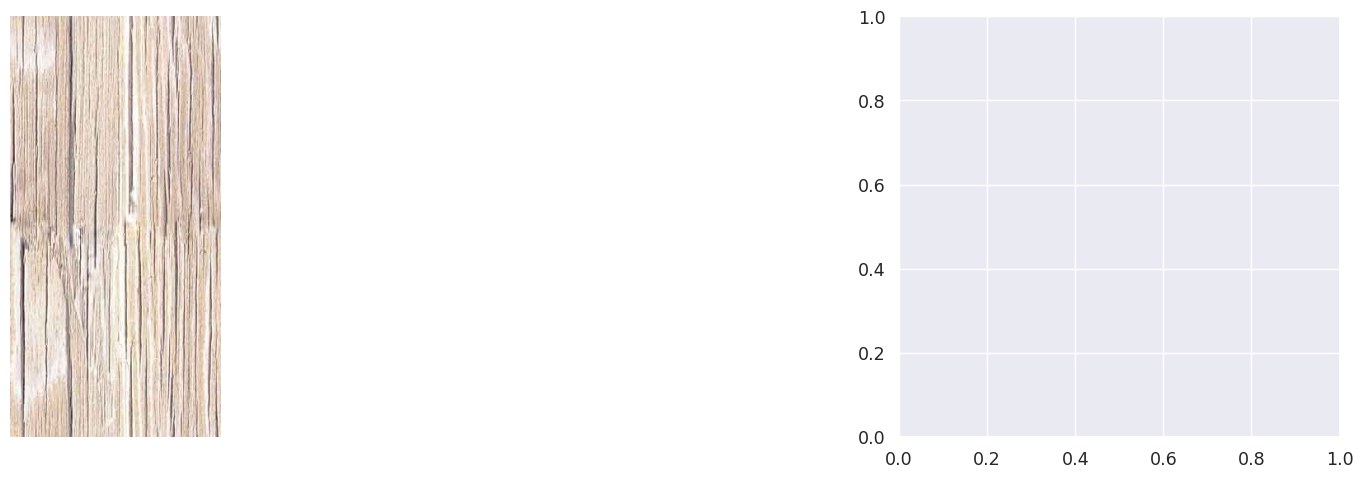

[bb1aa2cdf216d348e76bc197b3a3ffc0] UV density = 0.00% --> TOO LOW
Tried to load a GLB-converted ShapeNetCore object with more than 1 mesh. This is not allowed because, after pruning the non textured meshes, the resulting object may represent a small part of the original one, and thus, the resulting renderings would be meaningless.
Tried to load a GLB-converted ShapeNetCore object with more than 1 mesh. This is not allowed because, after pruning the non textured meshes, the resulting object may represent a small part of the original one, and thus, the resulting renderings would be meaningless.
Info: Removed 4236 vertices


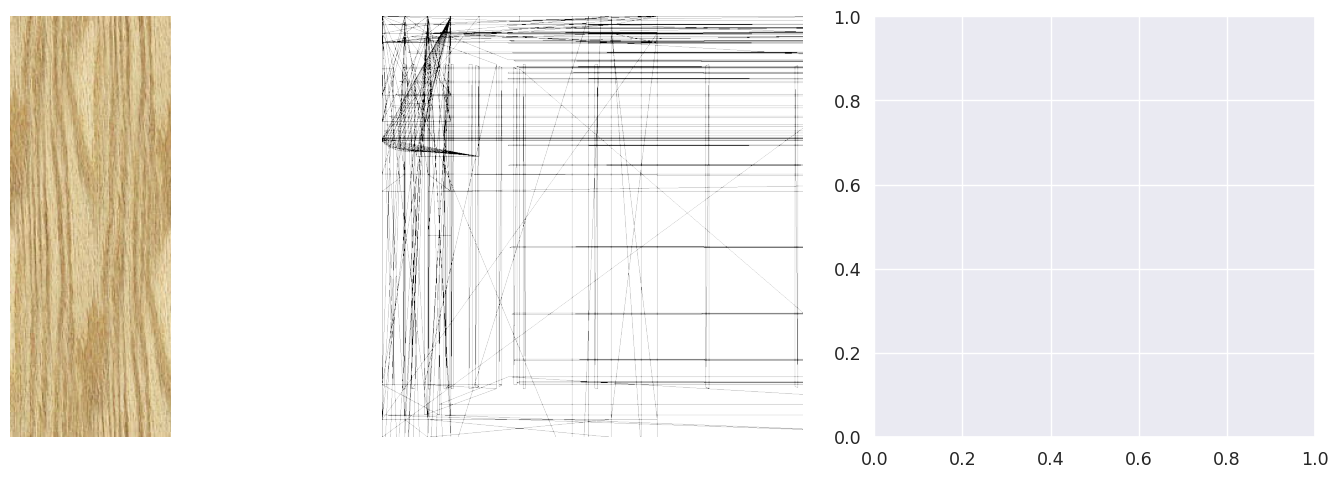

[1d898bbd8bbad8f98430b7446f9e1252] UV density = 15.02% --> OK


In [10]:
MIN_UV_DENSITY = 0.01
SAMPLES = 5

for uid in uids[random.sample(range(len(uids)), SAMPLES)]:
    if(obj := dataset[uid]) is None:
        continue
    diffuse = obj.textures
    uv_map = obj.draw_uv_map()

    plot_images([*(diffuse if diffuse else []), uv_map], cols=3, size=5)
    uv_density = compute_image_density(uv_map)
    print(
        colored(
            text=f"[{uid}] UV density = {uv_density:.2%} --> {'OK' if uv_density > MIN_UV_DENSITY else 'TOO LOW'}",
            color="green" if uv_density > MIN_UV_DENSITY else "red",
        )
    )

The UV maps are **very poor**.

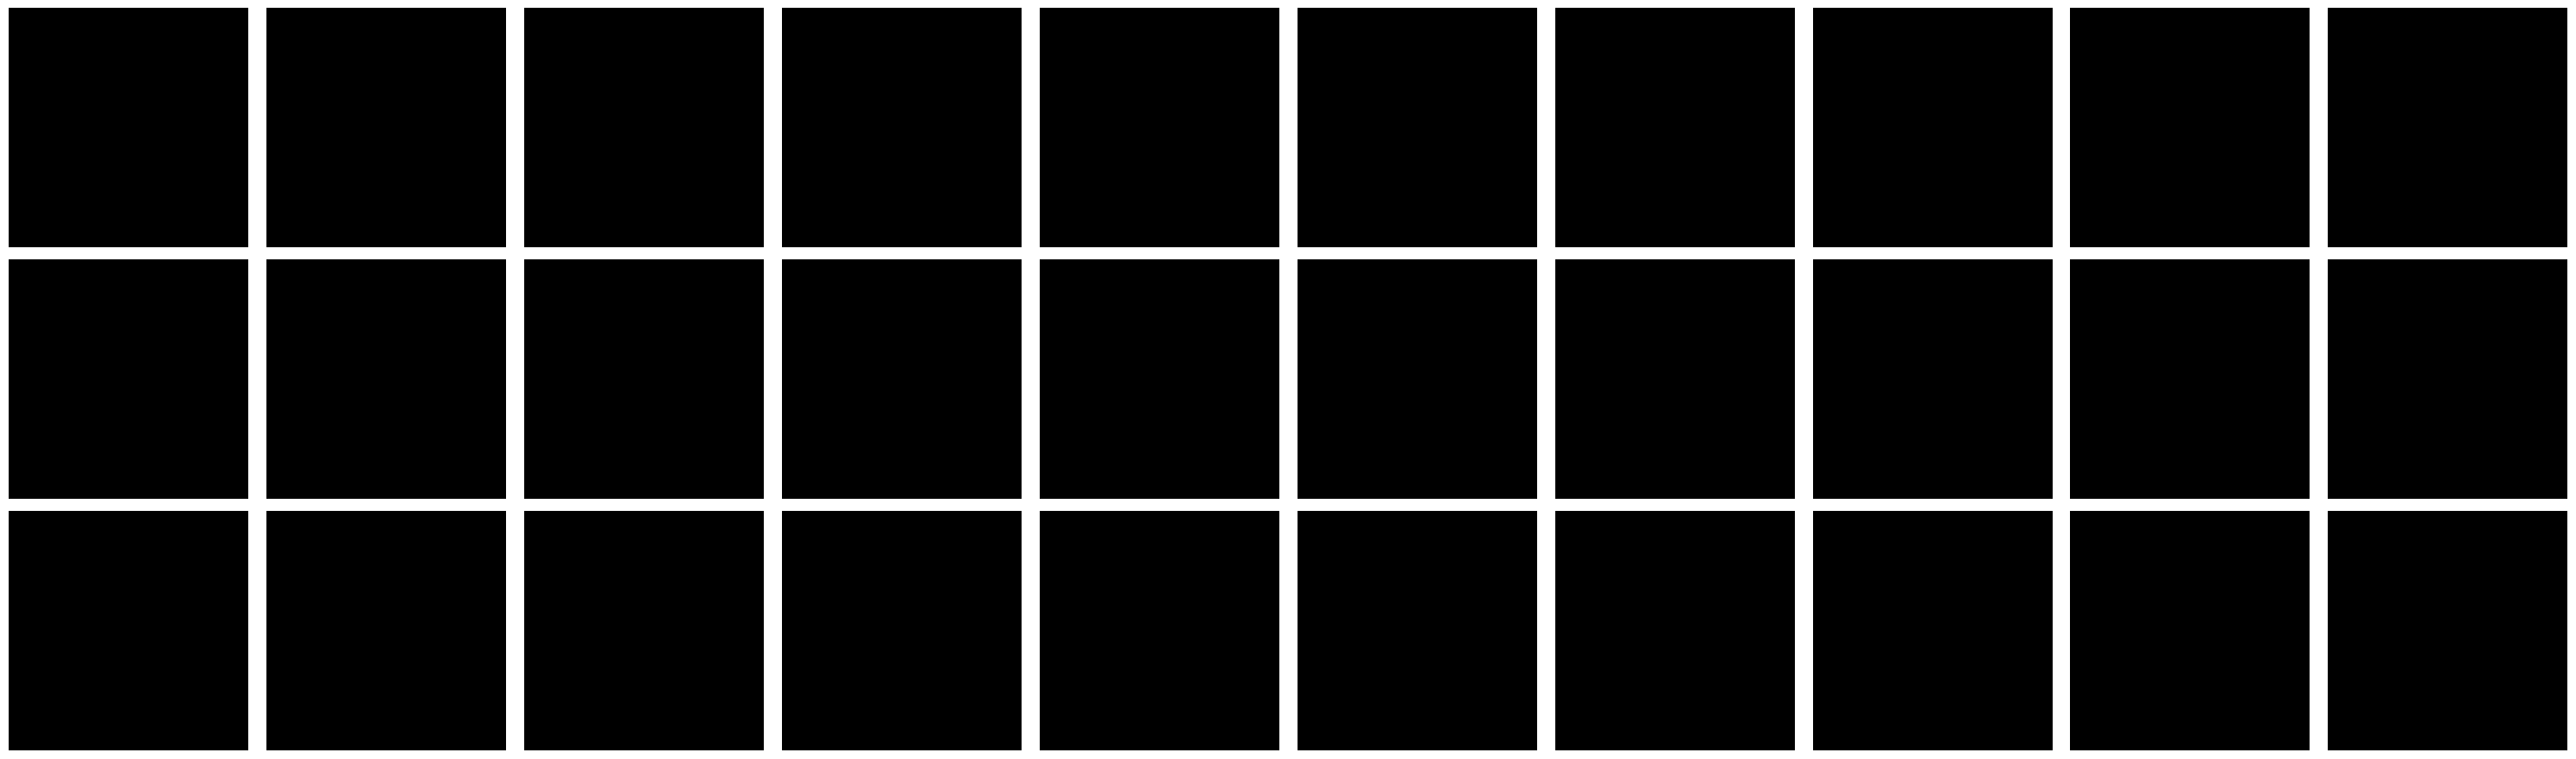

In [18]:
diffuses = random.sample(list((dataset.DATASET_DIR / "diffuse").glob("*.png")), 30)
plot_images(diffuses)